In [61]:
!pip install simpleaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import simpleaudio as sa

In [63]:
# import required library
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import math
import pandas as pd
from scipy import signal

In [64]:
def mfreqz(b, a, Fs):
   
    # Compute frequency response of the filter
    # using signal.freqz function
    wz, hz = signal.freqz(b, a)
 
    # Calculate Magnitude from hz in dB
    Mag = 20*np.log10(abs(hz))
 
    # Calculate phase angle in degree from hz
    Phase = np.unwrap(np.arctan2(np.imag(hz), np.real(hz)))*(180/np.pi)
 
    # Calculate frequency in Hz from wz
    Freq = wz*Fs/(2*np.pi)
 
    # Plot filter magnitude and phase responses using subplot.
    fig = plt.figure(figsize=(10, 6))
 
    # Plot Magnitude response
    sub1 = plt.subplot(2, 1, 1)
    sub1.plot(Freq, Mag, 'r', linewidth=2)
    sub1.axis([1, Fs/2, -100, 5])
    sub1.set_title('Magnitude Response', fontsize=20)
    sub1.set_xlabel('Frequency [Hz]', fontsize=20)
    sub1.set_ylabel('Magnitude [dB]', fontsize=20)
    sub1.grid()
 
    # Plot phase angle
    sub2 = plt.subplot(2, 1, 2)
    sub2.plot(Freq, Phase, 'g', linewidth=2)
    sub2.set_ylabel('Phase (degree)', fontsize=20)
    sub2.set_xlabel(r'Frequency (Hz)', fontsize=20)
    sub2.set_title(r'Phase response', fontsize=20)
    sub2.grid()
 
    plt.subplots_adjust(hspace=0.5)
    fig.tight_layout()
    plt.show()
 
# Define impz(b,a) to calculate impulse response
# and step response of a system
# input: b= an array containing numerator coefficients,
# a= an array containing denominator coefficients
def impz(b, a):
     
    # Define the impulse sequence of length 60
    impulse = np.repeat(0., 60)
    impulse[0] = 1.
    x = np.arange(0, 60)
 
    # Compute the impulse response
    response = signal.lfilter(b, a, impulse)
 
    # Plot filter impulse and step response:
    fig = plt.figure(figsize=(10, 6))
    plt.subplot(211)
    plt.stem(x, response, 'm', use_line_collection=True)
    plt.ylabel('Amplitude', fontsize=15)
    plt.xlabel(r'n (samples)', fontsize=15)
    plt.title(r'Impulse response', fontsize=15)
 
    plt.subplot(212)
    step = np.cumsum(response)  # Compute step response of the system
 
    plt.stem(x, step, 'g', use_line_collection=True)
    plt.ylabel('Amplitude', fontsize=15)
    plt.xlabel(r'n (samples)', fontsize=15)
    plt.title(r'Step response', fontsize=15)
    plt.subplots_adjust(hspace=0.5)
 
    fig.tight_layout()
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


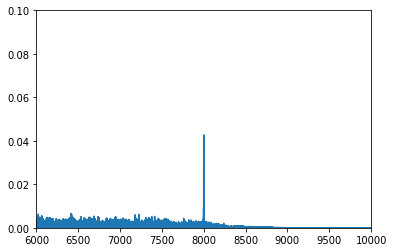

In [65]:
fig, ax = plt.subplots()
[Fs,audio] = wav.read('fala-tom-alta-freq.wav')

comRuido = audio/max(abs(audio))
fourier = np.fft.fft(comRuido)
n = fourier.size
freq = np.fft.fftfreq(n, 1/fs)
plt.xlim(6000,10000)
plt.ylim(0,0.1)
plt.plot(freq,abs(fourier)*2/fs)
plt.show()

In [66]:
fp = np.array([1400, 2100])  # Pass band frequency in Hz
Ap = 0.4  # Pass band ripple in dB
As = 50  # stop band attenuation in dB

In [67]:
# Compute pass band and stop band edge frequencies
wp = fp/(Fs/2) # Normalized passband edge frequencies w.r.t. Nyquist rate
ws = fs/(Fs/2) # Normalized stopband edge frequencies
print('Normalized passband edge frequencies=', wp)
print('Normalized stopband edge frequencies=', ws)

Normalized passband edge frequencies= [0.05833333 0.0875    ]
Normalized stopband edge frequencies= 2.0


In [68]:
# Compute order of the digital Butterworth filter using signal.buttord
N, wc = signal.buttord(0.2, 0.3, Ap, As, analog=True)
# Print the order of the filter and cutoff frequencies
print('Order of the filter=', N)
print('Cut-off frequency=', wc)

Order of the filter= 18
Cut-off frequency= 0.21342254594870133


In [69]:
# Design digital Butterworth 
# filter using signal.butter function
z, p = signal.butter(N, wc, 'lowpass')
 
# Print numerator and denomerator
# coefficients of the filter
print('Numerator Coefficients:', z)
print('Denominator Coefficients:', p)

Numerator Coefficients: [1.10635627e-10 1.99144129e-09 1.69272509e-08 9.02786717e-08
 3.38545019e-07 9.47926053e-07 2.05383978e-06 3.52086820e-06
 4.84119377e-06 5.37910419e-06 4.84119377e-06 3.52086820e-06
 2.05383978e-06 9.47926053e-07 3.38545019e-07 9.02786717e-08
 1.69272509e-08 1.99144129e-09 1.10635627e-10]
Denominator Coefficients: [ 1.00000000e+00 -1.03097157e+01  5.12674980e+01 -1.63002806e+02
  3.70639364e+02 -6.39070976e+02  8.64863832e+02 -9.38296110e+02
  8.26520926e+02 -5.95080876e+02  3.50775585e+02 -1.68776063e+02
  6.57568487e+01 -2.04536800e+01  4.96530542e+00 -9.07351999e-01
  1.17489969e-01 -9.61647208e-03  3.74323303e-04]


In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
#coef = pd.read_csv('coeficientes.csv',sep=';',header=None)
#b=coef.values.ravel()

filtrado = signal.lfilter(z, p, comRuido)


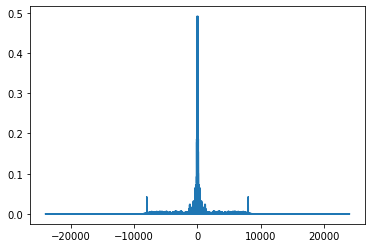

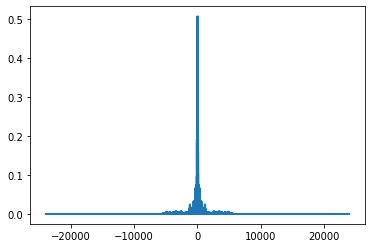

In [76]:
filtrado = filtrado/max(abs(filtrado))
wav.write('audio-sem-ruido.wav',fs,filtrado)
plt.plot(freq,abs(fourier)*2/fs)
filtradoFourier = np.fft.fft(filtrado)
plt.show()
n = filtradoFourier.size
freq = np.fft.fftfreq(n, 1/fs)
plt.plot(freq,abs(filtradoFourier)*2/fs)
plt.show()

In [77]:
# Compute frequency response of the filter using signal.freqz function
wz, hz = signal.freqz(z, p)

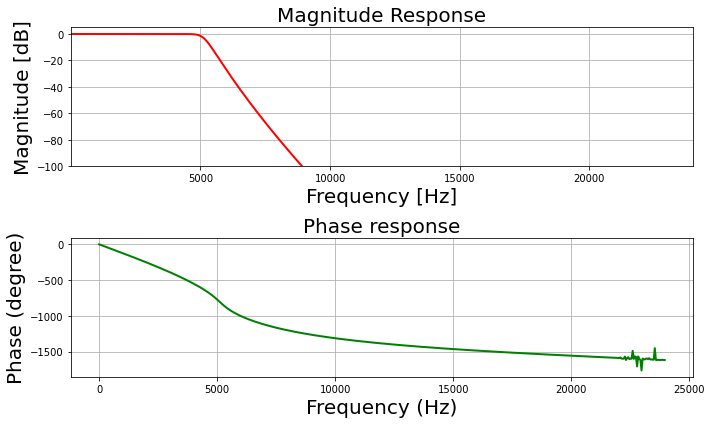

In [78]:
# Call mfreqz to plot the magnitude and phase response
mfreqz(z, p, Fs)

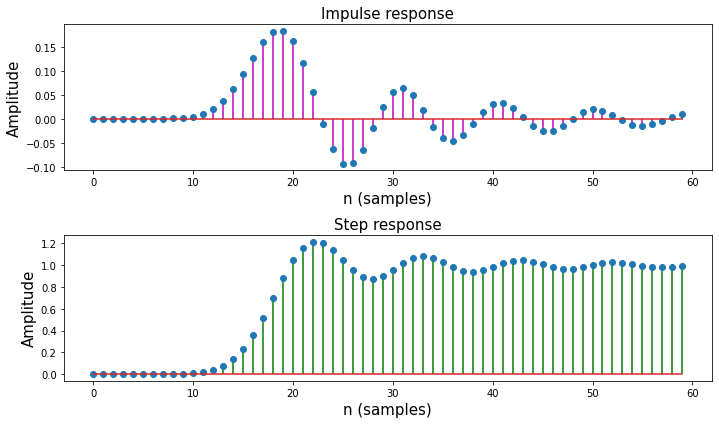

In [79]:
# Call impz function to plot impulse
# and step response of the filter
impz(z, p)